In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style as style

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
# Get the number of rides for urban cities.
urban_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
urban_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [11]:
# Get the total number of drivers for each urban city.
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
# Get the total fares for each urban city.
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"].map("${:,.2f}".format)
total_fares.head()

type
Rural        $4,327.93
Suburban    $19,356.33
Urban       $39,854.38
Name: fare, dtype: object

In [13]:
# Get the Average fare per ride for each urban city.
Average_fare_per_ride=(pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]).map("${:,.2f}".format)
Average_fare_per_ride

type
Rural       $34.62
Suburban    $30.97
Urban       $24.53
dtype: object

In [14]:
# Get the average fare per driver for each urban city.
Average_fare_per_driver=(pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]).map("${:,.2f}".format)
Average_fare_per_driver

type
Rural       $55.49
Suburban    $39.50
Urban       $16.57
dtype: object

In [15]:
#summary table Total Rides,Total Drivers, Total Fares, Average Fare per Ride, Average Fare per Driver for each urban city.
Pyber_summary_df = pd.DataFrame({
             "Total Rides": urban_ride_count,
             "Total Drivers": driver_count,
             "Total Fares":total_fares,
            "Average Fare per Ride":Average_fare_per_ride,
             "Average Fare per Driver":Average_fare_per_driver})
Pyber_summary_df.index.name=""
Pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [29]:
#Change the columns' names for the merge pyber_data set.
pyber_data_df=pyber_data_df.rename(columns={'city':'City','date':'Date','fare':'Fare','ride_id':'Ride Id','driver_count':'No. Drivers','type':'City Type'})
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [30]:
#Set the 'Date' as the index.
pyber_data_df=pyber_data_df.set_index("Date")
pyber_data_df.head()


KeyError: "None of ['Date'] are in the columns"

In [31]:
#Dateframe with Date, City type and Fare.
fare_city_df=pyber_data_df[["City Type","Fare"]].copy()
fare_city_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [19]:
#check data type.
fare_city_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [20]:
#Change "Date" datatype to Datetime.
fare_city_df.index=fare_city_df.index.astype('datetime64[ns]')
fare_city_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [21]:
total_fares=fare_city_df.groupby(["City Type", "Date"]).sum()["Fare"]
total_fares


City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [22]:
#reset the index for the dataframe.
pyber_data_df.reset_index()

,Date,City,Fare,Ride Id,No. Drivers,City Type
0,2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2,2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
3,2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
4,2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2371,2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2372,2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural
2373,2019-05-07 19:22:15,West Heather,44.94,4256853490277,4,Rural


In [23]:
#Create pivot table with Date, Fare and  city type.
fare_table=pd.pivot_table(pyber_data_df, values='Fare', columns=['City Type'], index=['Date'])
fare_table

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [24]:
#Look for the date between 2019-1-1 to 2019-4-28 from the dataframe.
fare_table_modified=fare_table.loc['2019-01-01':'2019-04-29']
fare_table_modified

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [25]:
#Change the 'Date' datatype to datatime.
fare_table_modified.index=fare_table_modified.index.astype('datetime64[ns]')
fare_table_modified.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [26]:
#Calculate the total fares weekly for each city type.
weekly_fare=fare_table_modified.resample('W').sum()
weekly_fare

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


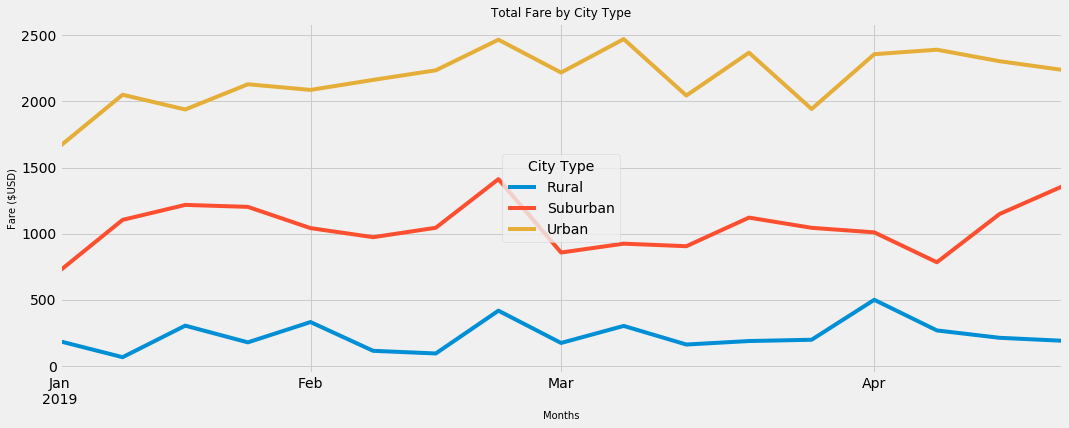

In [28]:
#plot line chart from weekly_fare pivot table.
ax=weekly_fare.plot(figsize=(16,6))
style.use('fivethirtyeight')
ax.set_title('Total Fare by City Type',fontsize=12)
ax.set_ylabel('Fare ($USD)',fontsize=10)
ax.set_xlabel("Months",fontsize=10)

## Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()